In [1]:
import numpy as np
import g3lhalo
import pyccl as ccl
import matplotlib.pyplot as plt

In [2]:
model=g3lhalo.halomodel(1e-4, 1e7, 0.001, 2, 1e10, 1e17)

In [3]:
# Cosmology

model.set_cosmo(0.27, 0.045, 0.67, 0.83, 0.96)


In [4]:


ks=np.geomspace(1e-4, 1e7, 128)
zs=np.linspace(0.001, 2, 128)

a=1/(1+zs)

cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, sigma8=0.83, n_s=0.96)

pk_lin=ccl.linear_matter_power(cosmo, ks, a)

w = ccl.comoving_angular_distance(cosmo, a)

c_over_H0=3000 #Mpc/h
dwdz=1/np.sqrt(ccl.h_over_h0(cosmo, a))*c_over_H0

In [5]:
ccl.rho_x(cosmo,a, 'matter')

array([3.93625022e+10, 4.12487124e+10, 4.31942369e+10, 4.51999941e+10,
       4.72669021e+10, 4.93958792e+10, 5.15878436e+10, 5.38437136e+10,
       5.61644075e+10, 5.85508434e+10, 6.10039397e+10, 6.35246145e+10,
       6.61137862e+10, 6.87723729e+10, 7.15012929e+10, 7.43014645e+10,
       7.71738059e+10, 8.01192353e+10, 8.31386710e+10, 8.62330313e+10,
       8.94032343e+10, 9.26501983e+10, 9.59748417e+10, 9.93780825e+10,
       1.02860839e+11, 1.06424030e+11, 1.10068573e+11, 1.13795386e+11,
       1.17605388e+11, 1.21499497e+11, 1.25478632e+11, 1.29543710e+11,
       1.33695649e+11, 1.37935369e+11, 1.42263786e+11, 1.46681821e+11,
       1.51190390e+11, 1.55790412e+11, 1.60482805e+11, 1.65268487e+11,
       1.70148378e+11, 1.75123394e+11, 1.80194454e+11, 1.85362477e+11,
       1.90628381e+11, 1.95993083e+11, 2.01457503e+11, 2.07022558e+11,
       2.12689167e+11, 2.18458247e+11, 2.24330718e+11, 2.30307497e+11,
       2.36389503e+11, 2.42577654e+11, 2.48872868e+11, 2.55276063e+11,
      

In [6]:
def gaussian(x, mu, sig):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )

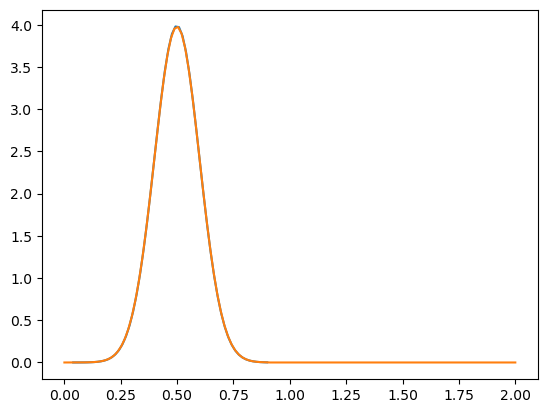

In [7]:
# Set lens density

zs2=np.linspace(0.04, 0.9, 56)
n=gaussian(zs2, 0.5, 0.1 )
n2=gaussian(zs2, 0.8, 0.05)
model.set_nz_lenses(zs2, n)
model.set_nz_sources(zs2, n2)


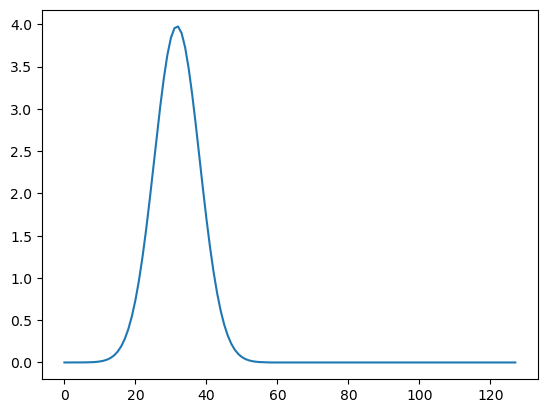

In [8]:
plt.plot(np.interp(zs, zs2, n, left=0, right=0))

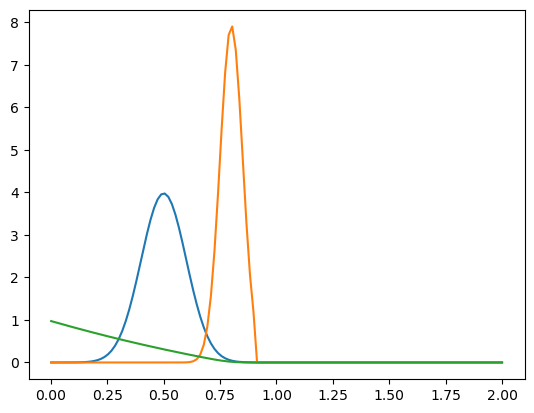

In [9]:
plt.plot(zs, model.n_l)
plt.plot(zs, model.n_s)
plt.plot(zs, model.gs)


In [10]:
# halo mass function
hmf=ccl.halos.MassFuncPress74()

model.set_hmf(hmf)


In [11]:
# halo bias

hbf=ccl.halos.HaloBiasSheth01()
model.set_halobias(hbf)

In [12]:
# Concentration mass relation

cmfunc=ccl.halos.ConcentrationDuffy08()
model.set_concentration_mass_relation(cmfunc)

(0.03, 100)

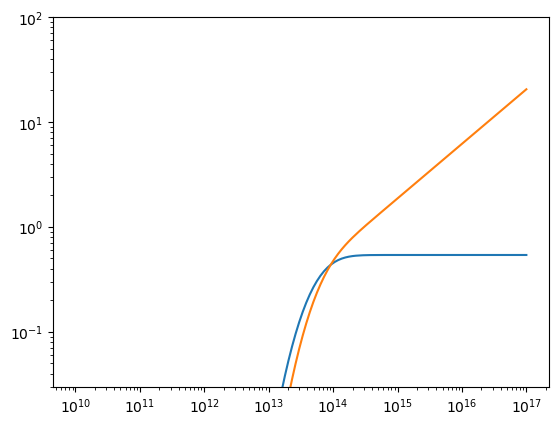

In [13]:
# HOD

alpha=0.2
sigma=0.7
Mth=5e13
Mprime=3e14
beta=0.52
alpha=0.54

hod_cen, hod_sat = g3lhalo.HOD_Zheng(alpha, Mth, sigma, Mprime, beta)

model.set_hods(hod_cen, hod_sat)

ms=np.geomspace(model.mmin, model.mmax, model.nbins)

plt.loglog()
plt.plot(ms, model.hod_cen1(ms))
plt.plot(ms, model.hod_sat1(ms))
plt.ylim(0.03, 100)


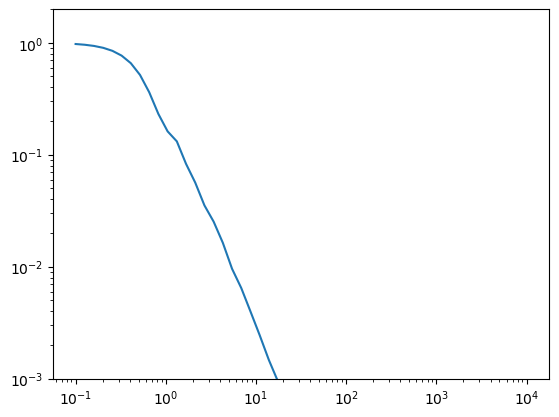

In [14]:
ks=np.geomspace(1e-1, 1e4)

us=model.u_NFW(ks, m=1e16, z=0, f=1)

plt.ylim(1e-3, 2)
plt.loglog(ks, us)

In [15]:
model.get_ave_numberdensity(0)

7.109117198300226e-05

In [16]:
h1=model.lens_lens_ps_1h(ks, 0)

TypeError: only length-1 arrays can be converted to Python scalars

In [ ]:
model.G_ab(ks, ks, 1e15, 0)

array([2.90532624e+00, 2.89122514e+00, 2.86882846e+00, 2.83341023e+00,
       2.77778727e+00, 2.69139674e+00, 2.55957091e+00, 2.36399297e+00,
       2.08648315e+00, 1.71941267e+00, 1.28414115e+00, 8.47334741e-01,
       5.05500157e-01, 3.19570938e-01, 2.45903998e-01, 1.65119613e-01,
       9.93747524e-02, 6.99414450e-02, 4.61556479e-02, 2.88029406e-02,
       1.88959098e-02, 1.09127226e-02, 7.22541106e-03, 4.29621574e-03,
       2.69321049e-03, 1.81548665e-03, 1.14467492e-03, 7.00824969e-04,
       4.32477170e-04, 2.71007108e-04, 1.68521418e-04, 1.10037693e-04,
       6.95369028e-05, 4.09277122e-05, 2.72006806e-05, 1.62619197e-05,
       1.03656537e-05, 6.57463997e-06, 3.81338404e-06, 2.42243985e-06,
       1.54000024e-06, 1.00271431e-06, 6.33498858e-07, 3.85836378e-07,
       2.28275089e-07, 1.49148006e-07, 8.77548400e-08, 6.04963252e-08,
       3.59391678e-08, 2.15706713e-08])

In [ ]:
model.hod_cen1(1e15)

0.539994945201681